In [1]:
import tensorflow as tf
from tensorflow import keras
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
x_train.shape


(60000, 28, 28)

In [3]:
x_test.shape


(10000, 28, 28)

In [4]:
y_train.shape


(60000,)

In [5]:
y_test.shape

(10000,)

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

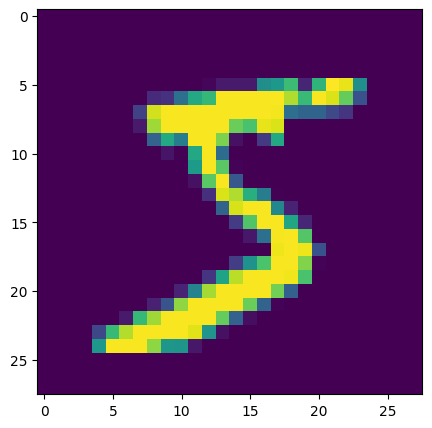

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x,y = x_train.shape[1:]
print(x,y)

28 28


In [10]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

<h1>모델 구성

In [11]:
model = tf.keras.Sequential([ 
tf.keras.layers.Reshape((28,28,1), input_shape=(28,28)),
tf.keras.layers.Conv2D(5,10,strides=1,activation="tanh",padding="valid"),
tf.keras.layers.Conv2D(10,5,strides=2,activation="tanh",padding="valid"),
tf.keras.layers.MaxPooling2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(16,activation="tanh"),
tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train)


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3547 - accuracy: 0.9077


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 19, 19, 5)         505       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 10)          1260      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 16)                2576      
                                                        

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((28,28,1), input_shape=(28,28)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3),data_format="channels_last"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train)


1875/1875 [==============================] - 11s 6ms/step - loss: 0.2339 - accuracy: 0.9303


In [14]:
x_train = x_train.reshape((60000, 1, 28, 28))
x_test = x_test.reshape((10000, 1 , 28, 28))
y_train = y_train.reshape((60000, 1,1,1))
y_test = y_test.reshape((10000, 1,1,1))

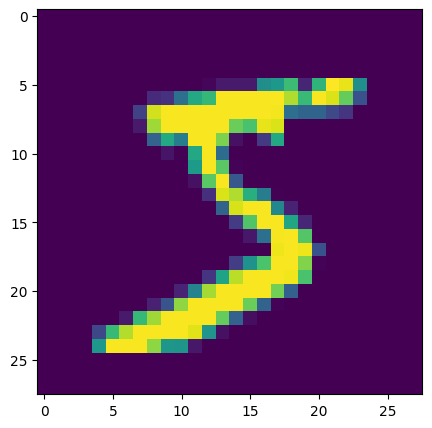

In [15]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5))
plt.imshow(x_train[0][0])

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28,28,1), input_shape=(28,28)),
    tf.keras.layers.ZeroPadding2D(padding=2),
    tf.keras.layers.Conv2D(filters=6,kernel_size=5,strides=1,activation="tanh",padding="valid"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Conv2D(filters=16,kernel_size=5,strides=1,activation="tanh",padding="valid"),                       
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2),    
    tf.keras.layers.Conv2D(filters=120,kernel_size=5,strides=1,activation="tanh",padding="valid"),
    tf.keras.layers.Dense(84,activation="tanh"),
    tf.keras.layers.Dense(10,activation="softmax")
    ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']),
model.fit(x_train, y_train)

ValueError: in user code:

    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\cpfld\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 1, 28, 28)


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print("테스트 정확도 : %d" %(test_acc*100))

313/313 - 1s - loss: 0.0945 - accuracy: 0.9718 - 687ms/epoch - 2ms/step
테스트 정확도 : 97


In [ ]:
print(y.shape,y_train.shape)

(60000, 1, 1, 10) (60000, 1, 1, 1)


In [ ]:
print(y[0])

[[[2.2964303e-05 2.2208309e-04 6.3666203e-06 3.4293845e-02 7.2778594e-06
   9.6467173e-01 2.0611154e-05 6.6860630e-05 3.3428002e-04 3.5394510e-04]]]


In [ ]:
y=model.predict(x_train)
print(y.shape,x_train.shape)

1875/1875 [==============================] - 4s 2ms/step
(60000, 1, 1, 10) (60000, 28, 28, 1)


In [ ]:
print(y[0])

[[[5.8902242e-05 3.2386612e-05 9.3773393e-05 2.9462626e-02 6.8596560e-06
   9.6922696e-01 6.5715773e-05 3.9365950e-05 6.1171700e-04 4.0169200e-04]]]
